In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
import ptitprince as pt

# Obrim l'arxiu
data = pd.read_csv("CensusIncomedata.txt", sep=" ")

# Eliminem features que no fem servir
data = data.drop(["age", "marital_status", "workclass", "education_num", "occupation", "hours_per_week"], axis=1)

# Mostrem dades
data

,race,sex,income
0,White,Male,53.80
1,White,Male,51.67
2,Black,Male,50.08
3,Black,Female,44.21
4,White,Female,48.91
...,...,...,...
32555,White,Female,40.41
32556,White,Male,56.03
32557,White,Female,41.71
32558,White,Male,50.97


In [78]:
# Salari mig dones
dones = data[data["sex"]==" Female"]
sm_dones = np.mean(dones["income"])
print("Salari mig dones: {}".format(sm_dones))

# Salari mig negres
negres = data[data["race"]==" Black"]
sm_negres = np.mean(negres["income"])
print("Salari mig negres: {}".format(sm_negres))

# Salari mig dones negres
dones_negres = dones[dones["race"]==" Black"]
sm_dones_negres = np.mean(dones_negres["income"])
print("Salari mig dones negres: {}".format(sm_dones_negres))

Salari mig dones: 41.52959056726405
Salari mig negres: 43.14683418693977
Salari mig dones negres: 41.60818006430866


In [79]:
# Salari mig homes
homes = data[data["sex"]==" Male"]
sm_homes = np.mean(homes["income"])
print("Salari mig homes: {}".format(sm_homes))

# Salari mig blancs
blancs = data[data["race"]==" White"]
sm_blancs = np.mean(blancs["income"])
print("Salari mig blancs: {}".format(sm_blancs))

# Salari mig homes negres
homes_blancs = homes[homes["race"]==" White"]
sm_homes_blancs = np.mean(homes_blancs["income"])
print("Salari mig homes blancs: {}".format(sm_homes_blancs))

Salari mig homes: 52.32476295378408
Salari mig blancs: 49.78750350530347
Salari mig homes blancs: 53.43882073749533


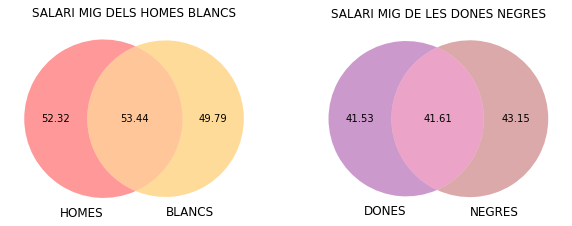

In [80]:
# Venn diagrams
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.subplot(1, 2, 1)
venn2(subsets=(round(sm_homes,2), round(sm_blancs,2), round(sm_homes_blancs,2)), 
      set_labels=("HOMES", "BLANCS"), 
      set_colors=["red", "orange"])
plt.title("SALARI MIG DELS HOMES BLANCS")
plt.subplot(1, 2, 2)
venn2(subsets=(round(sm_dones,2), round(sm_negres,2), round(sm_dones_negres,2)), 
      set_labels=("DONES", "NEGRES"), 
      set_colors=["purple", "brown"])
plt.title("SALARI MIG DE LES DONES NEGRES")
plt.show()

In [81]:
# Salari mig
sm = np.mean(data["income"])
print("Salari mig: {}".format(sm))

Salari mig: 48.75366953317011


In [82]:
# Homes blancs respecte al salari mig
hb_upper = len(homes_blancs[homes_blancs["income"]>sm])*100/len(homes_blancs)
hb_lower = 100 - hb_upper
print("Homes blancs per sobre del salari mig: {}".format(hb_upper))
print("Homes blancs per sota del salari mig: {}".format(hb_lower))

Homes blancs per sobre del salari mig: 86.89824231992907
Homes blancs per sota del salari mig: 13.101757680070932


In [83]:
# Dones negres respecte al salari mig
dn_upper = len(dones_negres[dones_negres["income"]>sm])*100/len(dones_negres)
dn_lower = 100 - dn_upper
print("Dones negres per sobre del salari mig: {}".format(dn_upper))
print("Dones negres per sota del salari mig: {}".format(dn_lower))

Dones negres per sobre del salari mig: 5.594855305466238
Dones negres per sota del salari mig: 94.40514469453376


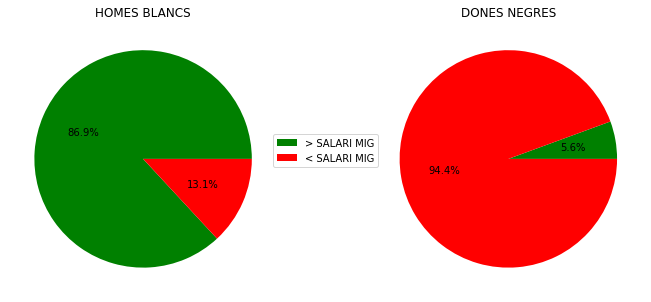

In [84]:
# Pie charts
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
plt.subplot(1, 2, 1)
plt.pie((hb_upper, hb_lower), 
       colors=["green", "red"],
        autopct='%1.1f%%')
plt.title("HOMES BLANCS")
plt.subplot(1, 2, 2)
plt.pie((dn_upper, dn_lower), 
       colors=["green", "red"],
        autopct='%1.1f%%')
plt.title("DONES NEGRES")
fig.legend(["> SALARI MIG", "< SALARI MIG"], loc="center")
plt.show()

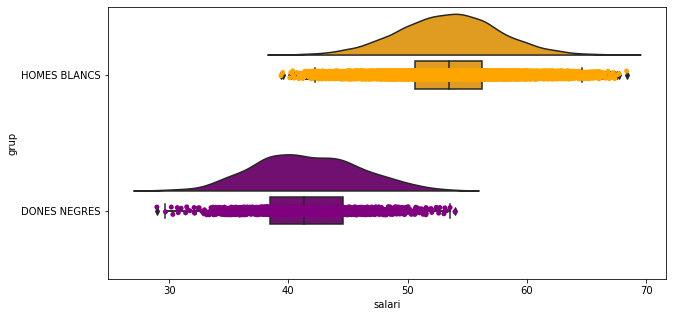

In [85]:
# Raincloud plots
hb_data = pd.DataFrame({"salari": homes_blancs["income"], "grup": "HOMES BLANCS"})
dn_data = pd.DataFrame({"salari": dones_negres["income"], "grup": "DONES NEGRES"})
raincloud_data = pd.concat([hb_data, dn_data], axis=0)

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = pt.half_violinplot(x="salari", y="grup", data=raincloud_data, width=0.6, palette=["orange", "purple"])
ax = sns.stripplot(x="salari", y="grup", data=raincloud_data, jitter=0.03, palette=["orange", "purple"])
ax = sns.boxplot(x="salari", y="grup", data=raincloud_data, width=0.2, palette=["orange", "purple"])
plt.show()